In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load datasets

In [5]:
# load acceptance and signal datasets 

data_path = '../data'

signal_path = f'{data_path}/signal.pkl'
acceptance_path = f'{data_path}/acceptance_mc.pkl'

signal = pd.read_pickle(signal_path)
acceptance = pd.read_pickle(acceptance_path)

## Summarise datasets

In [34]:
def summarise(dataset):
    print(f'shape: {dataset.shape}')
    return dataset.describe()

In [37]:
summarise(signal[['q2', 'costhetal']])

shape: (255741, 2)


,q2,costhetal
count,255741.000000,255741.000000
mean,9.746009,0.196761
std,5.322648,0.504987
min,0.044967,-0.999933
25%,5.803496,-0.191602
50%,10.501237,0.238716
75%,14.056658,0.625631
max,20.520857,0.999983


In [36]:
summarise(acceptance[['q2', 'costhetal']])

shape: (716859, 2)


,q2,costhetal
count,716859.000000,716859.000000
mean,10.140675,0.000475
std,5.286847,0.559045
min,0.045329,-0.999988
25%,5.859915,-0.469862
50%,10.461088,-0.000216
75%,14.583190,0.473089
max,21.138934,1.000000


<AxesSubplot:ylabel='Frequency'>

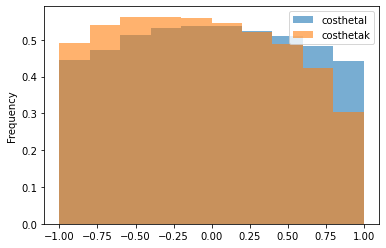

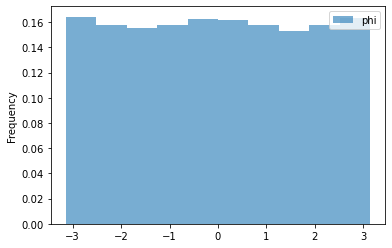

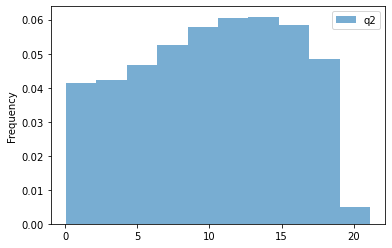

In [73]:
acceptance[['costhetal', 'costhetak']].plot.hist(density=True, alpha=0.6)
acceptance[['phi']].plot.hist(density=True, alpha=0.6)
acceptance[['q2']].plot.hist(density=True, alpha=0.6)

## Visualise angular distribution 

Split by $q^2$ and see histogram against $\cos\theta$.

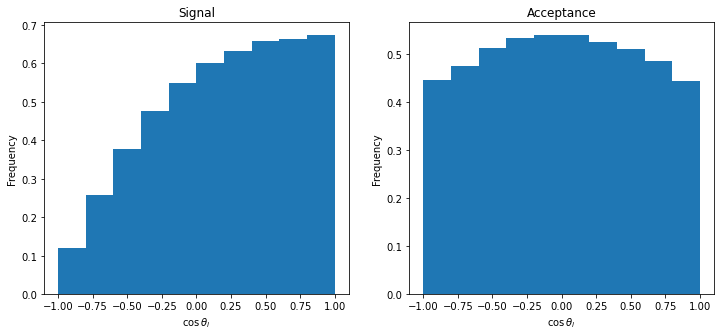

In [58]:
# rough comparison 

plt.figure(figsize=(12, 5))
plt.tight_layout()

plt.subplot(1, 2, 1)
plt.title('Signal')
signal['costhetal'].plot.hist(density=True)
plt.xlabel(r'$\cos\theta_l$')

plt.subplot(1, 2, 2)
plt.title('Acceptance')
acceptance['costhetal'].plot.hist(density=True)
plt.xlabel(r'$\cos\theta_l$');

In [40]:
# load q^2 bins
q2_bin_defs = '''0	0.1 - 0.98
1	1.1 - 2.5
2	2.5 - 4.0
3	4.0 - 6.0
4	6.0 - 8.0
5	15.0 - 17.0
6	17.0 - 19.0
7	11.0 - 12.5
8	1.0 - 6.0
9	15.0 - 17.9'''.split('\n')
q2_ranges = [tuple(map(float, x[2:].split(' - '))) for x in q2_bin_defs]
q2_ranges

[(0.1, 0.98),
 (1.1, 2.5),
 (2.5, 4.0),
 (4.0, 6.0),
 (6.0, 8.0),
 (15.0, 17.0),
 (17.0, 19.0),
 (11.0, 12.5),
 (1.0, 6.0),
 (15.0, 17.9)]

In [123]:
def plot_ang_distr(sig, acp):
    plt.subplot(1, 2, 1)
    plt.title('Acceptance')
    acp['costhetal'].plot.hist(density=True)
    plt.xlabel(r'$\cos\theta_l$')

    plt.subplot(1, 2, 2)
    plt.title('Signal')
    sig['costhetal'].plot.hist(density=True)
    plt.xlabel(r'$\cos\theta_l$')
    
    
def plot_ang_distr_q2(q2_range):
    q2_low, q2_high = q2_range
    
    sig = signal.query('q2 > @q2_low & q2 < @q2_high')
    acp = acceptance.query('q2 > @q2_low & q2 < @q2_high')
    
    plt.figure(figsize=(12, 5))
    plt.tight_layout()
    plot_ang_distr(sig, acp)
    plt.suptitle(f'q2: {q2_low} - {q2_high}')
    plt.show()
    
    del sig, acp # free up memory 

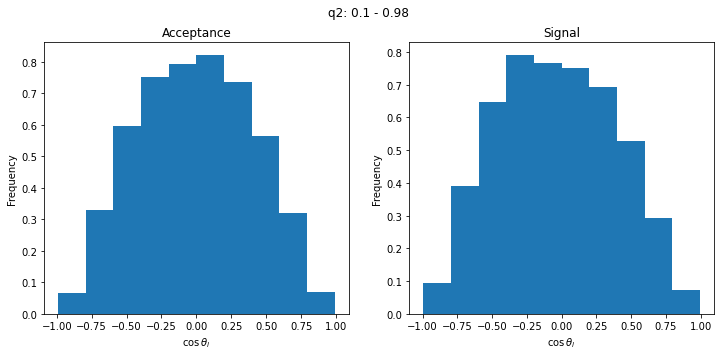

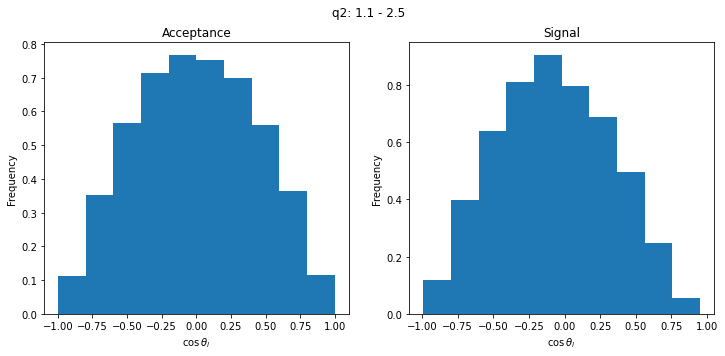

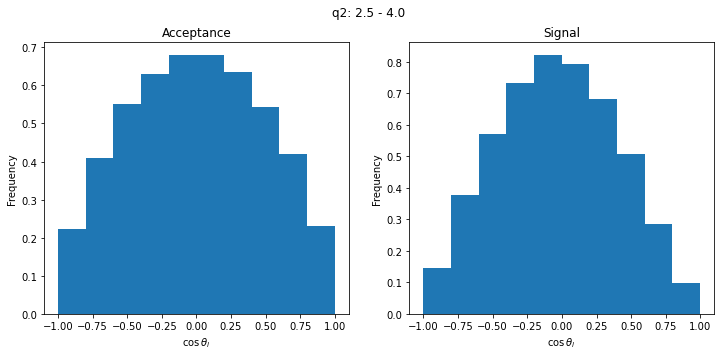

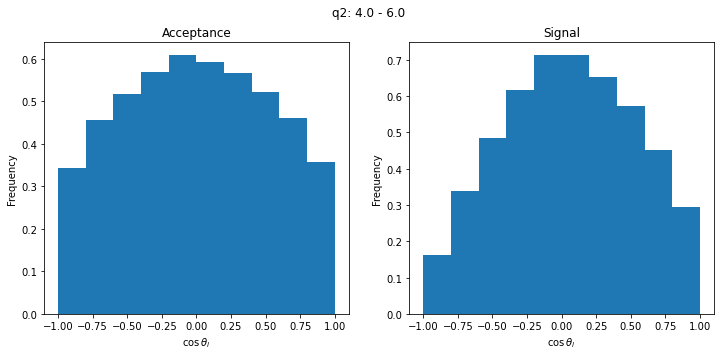

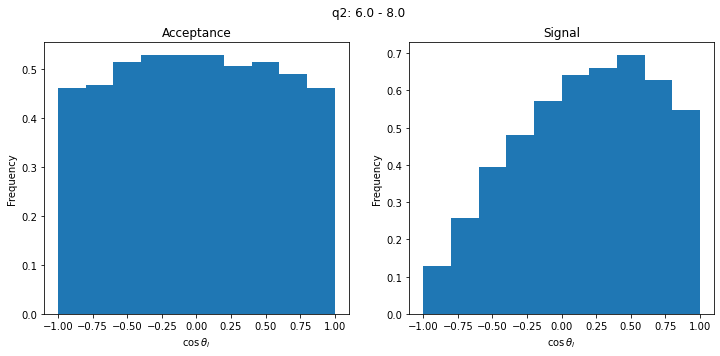

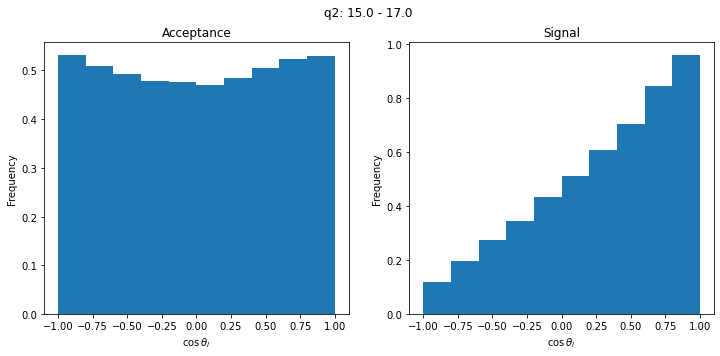

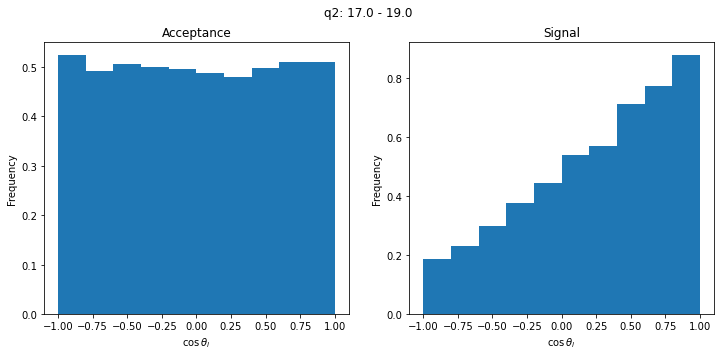

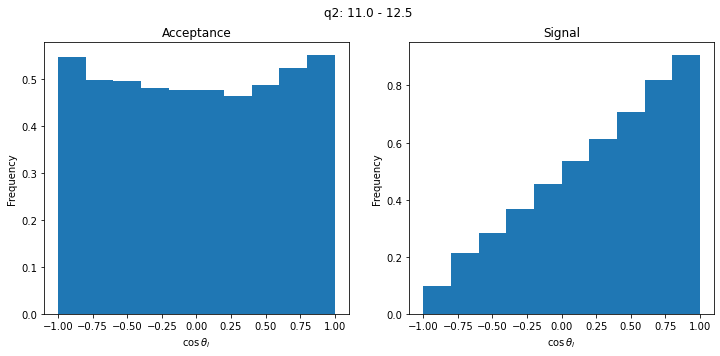

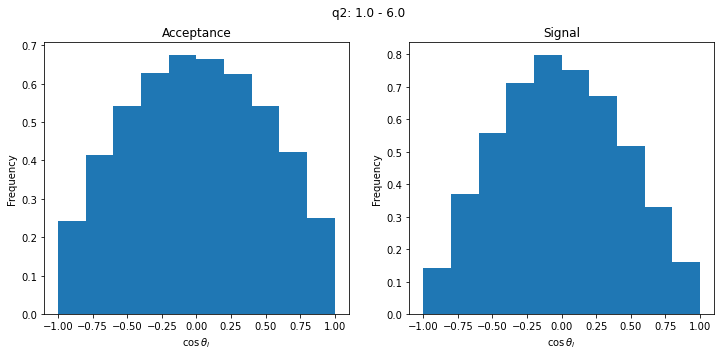

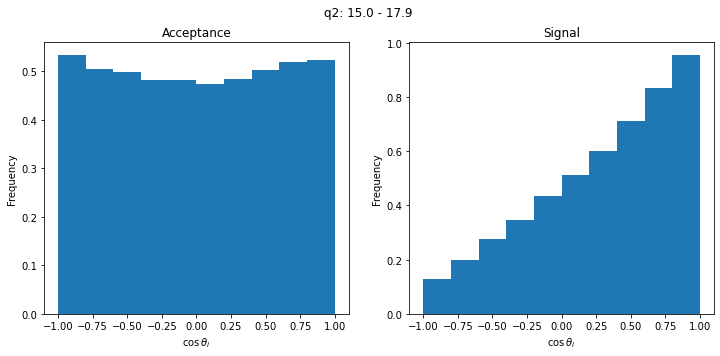

In [124]:
for q2_range in q2_ranges:
    plot_ang_distr_q2(q2_range)

## Stack bins

Split by bin number and overlay histograms

In [55]:
q2_ranges_unique = q2_ranges[:-2] # last two bin ranges overlap 
q2_ranges_unique

[(0.1, 0.98),
 (1.1, 2.5),
 (2.5, 4.0),
 (4.0, 6.0),
 (6.0, 8.0),
 (15.0, 17.0),
 (17.0, 19.0),
 (11.0, 12.5)]

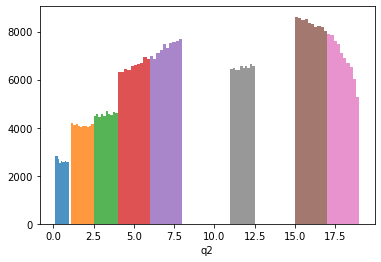

In [126]:
# visualise bin edges 
grouped = acceptance.groupby('bin_number')
for name, data in grouped:
    plt.hist(data['q2'], alpha=0.8, density=False, label=int(name))
plt.xlabel('q2');

In [98]:
# create column with bin number 
def calc_bin_number(q2, ranges=q2_ranges_unique):
    for i, r in enumerate(q2_ranges_unique):
        r_low, r_high = r
        if q2 > r_low and q2 < r_high:
            return i
    return np.nan # not included in the bins 

def create_column_bin_number(df):
    df['bin_number'] = df['q2'].apply(calc_bin_number).astype('category')

In [99]:
create_column_bin_number(signal)
create_column_bin_number(acceptance)

In [121]:
def plot_grouped(df):
    grouped = df.groupby('bin_number')
    for name, data in grouped:
        plt.hist(data['costhetal'], alpha=1, density=True, label=int(name), histtype='step')

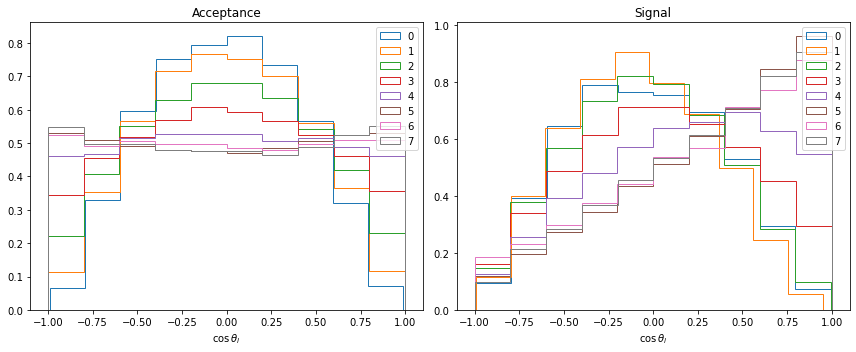

In [122]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plot_grouped(acceptance[['costhetal', 'bin_number']])
plt.legend()
plt.title('Acceptance')
plt.xlabel(r'$\cos\theta_l$')

plt.subplot(122)
plot_grouped(signal[['costhetal', 'bin_number']])
plt.legend()
plt.title('Signal')
plt.xlabel(r'$\cos\theta_l$')

plt.tight_layout()